### Price & Discount Relationships

9. Is there a **significant difference** between the average **discounted price** and **actual price** across product categories?
    → (*t-test or ANOVA*)

10. Does the **number of reviews (rating_count)** affect the **average rating**?
    → (*Correlation or regression*)

11. Is there a **significant difference** in average **ratings** between **top 3 product categories**?
    → (*ANOVA test*)


---

## what we are going to answer in that section

9. Is there a **significant difference** between the average **discounted price** and **actual price** across product categories?
    → (*t-test or ANOVA*)

In [1]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm


# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 9. Is there a **significant difference** between the average **discounted price** and **actual price** across product categories?
    → (*t-test or ANOVA*)

In [3]:
df['category_clean'] = df['category'].apply(lambda x: x.split('|')[-1])
df.sort_values(by= 'category')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,2320.00,4000.0,0.42,3.8,1118.0,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...,AirPurifiers&Ionizers
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,299.94,4999.0,0.94,4.3,4426.0,【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...,USBtoUSBAdapters
742,B094DQWV9B,Kanget [2 Pack] Type C Female to USB A Male Ch...,Computers&Accessories|Accessories&Peripherals|...,147.63,399.0,0.63,4.0,1540.0,👍【USB C TO USB ADAPTER】-This is a USB C FEMALE...,"AFA6YM4NTFRGHHKYN5U7HUYEVSUA,AEB3EVUTQCHIE3PGI...","Abhi_K,Amazon Customer,Swap,shivam,Abhinav Sin...","R1QIWMR6C3F3U0,R1MSGOZTOMZE4B,R20OZCEE82GU0W,R...","Good and does it’s work,Nice product working a...",Using it to connect my type C Plantronic headp...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Kanget-Female-Adapter-St...,USBtoUSBAdapters
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,649.35,999.0,0.35,3.5,7222.0,Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...,PCHeadsets
748,B08SCCG9D4,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,940.00,2000.0,0.53,3.9,14969.0,Omnidirectional pickup pattern|3.5mm TRRS jack...,"AFROXVCIF6PZXFXLS7DLTPT2CGCQ,AHA4ODJMDNBNUVEUS...","Ansh KaTariA,Saqlain Shaikh,Sardar V.,Rushikes...","R20M6JOASW88SS,RPM4RV2MQNNN0,R19KRP5SDTN2NL,R1...","It's just good !,Good for WFH,Works according ...",It just good for beginners you can start your ...,https://m.media-amazon.com/images/I/41U9-x0JGP...,https://www.amazon.in/JBL-Commercial-Omnidirec...,PCMicrophones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,B00LOD70SC,Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,178.50,210.0,0.15,4.3,2450.0,Unique 3 dimple tip technology from Japan for ...,"AG3G7G2DUJKN5YMCOYZNCADKKJUQ,AH44B2X6AT45J37MH...","Madhusmita singh,Sandeep Singh,Jay OG,Asim,Vik...","R1AY8EXPHPWDDR,R24503W0UJGTMU,R27P97SD5T4MUX,R...","It's good,Good,One of the few items on amazon ...",Everything is fine but it's bit dark and stick...,https://m.media-amazon.com/images/I/31pJvN8OkS...,https://www.amazon.in/Pilot-Liquid-Roller-Ball...,RetractableBallpointPens
850,B07SBGFDX9,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts|OfficePaperProducts|Paper|Stati...,120.00,120.0,0.00,4.1,4308.0,"0.7 mm tip size|Black Body, Multicolor Ink(Bla...","AGK76H5VGHDWFQD7JTHVKZNQ5BHA,AHWXK2FU23OBRZZUA...","Parul S.,Prateek Tiwari,kateriki,golla 

In [4]:
df_clean = df[['category_clean', 'rating_count', 'rating']].dropna()
df_clean

,category_clean,rating_count,rating
0,USBCables,24269.0,4.2
1,USBCables,43994.0,4.0
2,USBCables,7928.0,3.9
3,USBCables,94363.0,4.2
4,USBCables,16905.0,4.2
...,...,...,...
1460,WaterPurifierAccessories,1090.0,4.0
1461,Rice&PastaCookers,4118.0,4.1
1462,HeatConvectors,468.0,3.6
1463,ExhaustFans,8031.0,4.0


In [5]:
counts = df_clean['category_clean'].value_counts()
valid_categories = counts[counts > 1].index
df_filtered = df[df['category_clean'].isin(valid_categories)]

In [6]:
df_cdr= df_filtered[['category_clean', 'actual_price', 'discounted_price']]
df_sorted= df_cdr.sort_values(by='category_clean').reset_index().drop(columns='index')
df_sorted['price_diff']= df_sorted['actual_price'] - df_sorted['discounted_price']
df_sorted

,category_clean,actual_price,discounted_price,price_diff
0,Adapters,600.0,210.00,390.00
1,Adapters,999.0,119.88,879.12
2,Adapters,999.0,119.88,879.12
3,AirFryers,10995.0,6816.90,4178.10
4,AirFryers,9995.0,7196.40,2798.60
...,...,...,...,...
1388,WirelessUSBAdapters,499.0,199.60,299.40
1389,WirelessUSBAdapters,2199.0,1209.45,989.55
1390,WirelessUSBAdapters,1208.0,507.36,700.64
1391,WirelessUSBAdapters,1339.0,749.84,589.16


t-statistic: 19.074171006227292
p-value: 3.053503199093073e-72


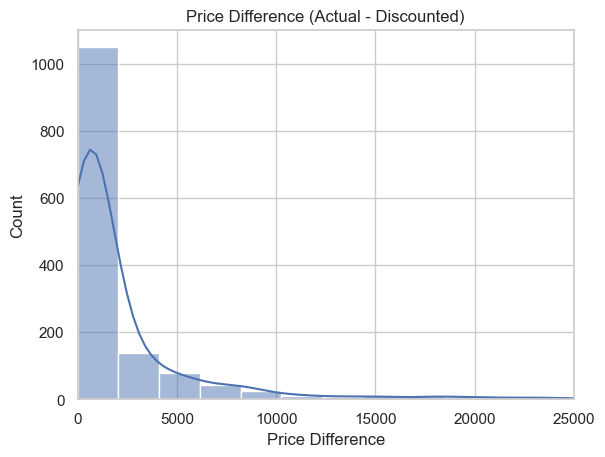

In [7]:
from scipy.stats import ttest_rel

t, p = ttest_rel(df_sorted['actual_price'], df_sorted['discounted_price'])

print("t-statistic:", t)
print("p-value:", p)

#------------------------------------------------------------------------#

sns.set_theme(style="whitegrid")

sns.histplot(data=df_sorted, x='price_diff', bins=30, kde=True)
plt.xlim(0, 25000)
plt.title('Price Difference (Actual - Discounted)')
plt.xlabel('Price Difference')
plt.ylabel('Count')
plt.show()
